# Data Toolkit Solutions
# Theory and Practical Questions

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

## Theory Questions

### 1. What is NumPy, and why is it widely used in Python?

NumPy (Numerical Python) is a fundamental package for scientific computing in Python. 
It's widely used because:
- It provides efficient multi-dimensional array objects
- It offers fast operations on arrays (vectorized operations)
- It includes mathematical functions for operating on these arrays
- It serves as a foundation for many other scientific libraries like Pandas, SciPy, etc.
- It has optimized C implementations that make calculations much faster than Python lists

### 2. How does broadcasting work in NumPy?

Broadcasting in NumPy is a mechanism that allows arrays with different shapes to be used in operations.
The smaller array is "broadcast" to match the shape of the larger array, creating a virtual copy
without actually duplicating data. This makes operations between arrays of different dimensions 
possible and memory-efficient.

Rules of broadcasting:
1. If arrays don't have the same dimensions, prepend dimensions of 1 to the smaller array
2. If the shape of the arrays doesn't match in any dimension, and one of them has a size of 1,
   the smaller one is stretched to match the larger one
3. If sizes differ and neither is 1, an error is raised

In [26]:
# Example of broadcasting
print("Broadcasting Example:")
a = np.array([1, 2, 3])  # Shape: (3,)
b = np.array([[1], [2], [3]])  # Shape: (3, 1)
print(f"Array a shape: {a.shape}, Array b shape: {b.shape}")
c = a + b  # Broadcasting happens here
print(f"Result shape after broadcasting: {c.shape}")
print("Result array:")
print(c)

Broadcasting Example:
Array a shape: (3,), Array b shape: (3, 1)
Result shape after broadcasting: (3, 3)
Result array:
[[2 3 4]
 [3 4 5]
 [4 5 6]]


### 3. What is a Pandas DataFrame?

A Pandas DataFrame is a 2-dimensional labeled data structure with columns that can be of different types.
It's similar to a spreadsheet, SQL table, or a dictionary of Series objects. Key features include:
- Column and row labels
- Ability to perform operations on rows or columns
- Can handle heterogeneous data types
- Powerful data alignment and integrated handling of missing data
- Flexible reshaping, merging, and pivoting of data sets

### 4. Explain the use of the groupby() method in Pandas.

The groupby() method in Pandas is used for grouping data according to specified criteria and then applying
a function to each group independently. The workflow typically follows a split-apply-combine pattern:
1. Split: Data is grouped based on one or more keys
2. Apply: A function is applied to each group independently
3. Combine: The results are combined into a new data structure

It's particularly useful for aggregation operations (sum, mean, count), transformations, and filtering operations.

In [27]:
# Example of groupby()
print("\nPandas groupby() example:")
df = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'B', 'A', 'B'],
    'Value': [10, 20, 15, 25, 5, 30]
})
print("Original DataFrame:")
print(df)
grouped = df.groupby('Category').agg({'Value': ['sum', 'mean', 'count']})
print("\nAfter groupby and aggregation:")
print(grouped)


Pandas groupby() example:
Original DataFrame:
  Category  Value
0        A     10
1        B     20
2        A     15
3        B     25
4        A      5
5        B     30

After groupby and aggregation:
         Value            
           sum  mean count
Category                  
A           30  10.0     3
B           75  25.0     3


### 5. Why is Seaborn preferred for statistical visualizations?

Seaborn is preferred for statistical visualizations because:
- It's built on top of Matplotlib but provides a higher-level interface
- It has built-in themes for creating aesthetically pleasing visualizations
- It includes specialized plots for statistical analysis (violin plots, box plots, etc.)
- It integrates well with Pandas DataFrames
- It automatically handles aggregation and statistical estimation
- It simplifies the creation of complex visualizations like heatmaps, pair plots, and facet grids

### 6. What are the differences between NumPy arrays and Python lists?

Key differences between NumPy arrays and Python lists:
- NumPy arrays are homogeneous (same data type) while Python lists can be heterogeneous
- NumPy arrays support vectorized operations, making calculations much faster
- NumPy arrays are more memory-efficient than Python lists
- NumPy arrays have built-in mathematical functions
- NumPy arrays can be multi-dimensional while Python lists need nested structures
- NumPy arrays have fixed size at creation, while Python lists are dynamic

### 7. What is a heatmap, and when should it be used?

A heatmap is a graphical representation of data where values are depicted by colors. It's useful for:
- Visualizing correlation matrices to show relationships between variables
- Displaying patterns in large datasets where color intensity represents value magnitude
- Showing variations across two dimensions (like time and categories)
- Identifying clusters or outliers in complex data
- Visualizing hierarchical clustering results
- Representing geographical or spatial data distributions

### 8. What does the term "vectorized operation" mean in NumPy?

Vectorized operations in NumPy refer to operations that are applied to entire arrays at once, rather than
using explicit loops in Python. Benefits include:
- Significantly faster execution as operations are implemented in C
- Cleaner, more readable code without explicit loops
- Better memory management and cache utilization
- Enables parallel computation on modern hardware
- Facilitates mathematical expressions that closely resemble their algebraic notation

In [28]:
# Example of vectorized operation vs loop
print("\nVectorized operation example:")
array = np.random.rand(1000000)
# Time a vectorized operation
%time vectorized_result = array * 2
# Time a loop operation (uncomment to see the difference)
# %time loop_result = [x * 2 for x in array]
print("Vectorized operations are much faster than loops for large arrays")


Vectorized operation example:
CPU times: total: 0 ns
Wall time: 5.05 ms
Vectorized operations are much faster than loops for large arrays


### 9. How does Matplotlib differ from Plotly?

Key differences between Matplotlib and Plotly:
- Matplotlib is primarily a static plotting library, while Plotly specializes in interactive visualizations
- Plotly generates JavaScript-based plots that are web-ready, while Matplotlib produces static images
- Plotly has built-in support for hover tooltips and zooming without additional coding
- Matplotlib offers more fine-grained control over plot elements
- Plotly has better support for 3D visualizations and animated plots
- Matplotlib is more traditional and has been around longer with extensive documentation

### 10. What is the significance of hierarchical indexing in Pandas?

Hierarchical indexing (MultiIndex) in Pandas allows:
- Representing higher-dimensional data in a tabular format with multiple levels of row and column indices
- More intuitive handling of grouped data
- Advanced data selection and manipulation through partial indexing
- Reshaping data through operations like stack() and unstack()
- Representing panel data (3D data) in a 2D DataFrame
- More efficient storage and querying of sparse data

In [29]:
# Example of hierarchical indexing
print("\nHierarchical indexing example:")
multi_index = pd.MultiIndex.from_tuples([('A', 1), ('A', 2), ('B', 1), ('B', 2)])
df_multi = pd.DataFrame(np.random.rand(4, 2), index=multi_index, columns=['X', 'Y'])
print(df_multi)
print("\nSelecting data from level 'A':")
print(df_multi.loc['A']) 


Hierarchical indexing example:
            X         Y
A 1  0.979467  0.114823
  2  0.220978  0.184828
B 1  0.602779  0.737716
  2  0.387549  0.957958

Selecting data from level 'A':
          X         Y
1  0.979467  0.114823
2  0.220978  0.184828


### 11. What is the role of Seaborn's pairplot() function?

Seaborn's pairplot() function creates a grid of scatter plots showing pairwise relationships between variables
in a dataset. It's useful for:
- Exploring correlations between multiple variables at once
- Visualizing the distribution of each variable (through histograms or KDE plots on the diagonal)
- Identifying patterns, clusters, or outliers in multivariate data
- Assessing the potential for linear relationships between pairs of variables
- Color-coding points by a categorical variable to reveal group-specific patterns

### 12. What is the purpose of the describe() function in Pandas?

The describe() function in Pandas generates descriptive statistics that summarize the central tendency,
dispersion, and shape of a dataset's distribution. It:
- Calculates count, mean, std, min, 25%, 50%, 75%, max for numeric columns
- Provides count, unique values, top value, and frequency for object columns
- Helps quickly understand the basic characteristics of data
- Identifies potential outliers or anomalies
- Assists in data preprocessing decisions
- Works with both Series and DataFrame objects

In [30]:
# Example of describe()
print("\nPandas describe() example:")
df_sample = pd.DataFrame({
    'A': np.random.normal(0, 1, 100),
    'B': np.random.uniform(0, 10, 100),
    'C': np.random.choice(['X', 'Y', 'Z'], 100)
})
print(df_sample.describe())
print("\nDescribe for categorical column:")
print(df_sample['C'].describe())


Pandas describe() example:
                A           B
count  100.000000  100.000000
mean     0.073088    4.799415
std      0.990033    2.925650
min     -2.799757    0.141203
25%     -0.423768    2.256738
50%      0.087367    4.559629
75%      0.703066    7.347308
max      2.453912    9.926212

Describe for categorical column:
count     100
unique      3
top         Y
freq       41
Name: C, dtype: object


### 13. Why is handling missing data important in Pandas?

Handling missing data in Pandas is important because:
- Missing values can lead to incorrect analysis and misleading conclusions
- Many statistical functions and machine learning algorithms can't handle missing values directly
- Complete-case analysis (dropping missing values) may introduce bias and reduce statistical power
- Proper handling preserves the integrity and representativeness of the dataset
- Different types of missingness (MCAR, MAR, MNAR) require different handling strategies
- Missing values might contain information about the data collection process

### 14. What are the benefits of using Plotly for data visualization?

Benefits of using Plotly for data visualization:
- Interactive plots with zoom, pan, and hover capabilities
- Web-ready visualizations that can be embedded in dashboards
- Support for a wide range of chart types, including scientific and financial charts
- Built-in animation capabilities for time-series data
- Support for creating dashboards with multiple linked visualizations
- Integration with Jupyter notebooks, Dash, and other web frameworks
- Advanced 3D plotting capabilities

### 15. How does NumPy handle multidimensional arrays?

NumPy handles multidimensional arrays through:
- ndarray object that can represent arrays of any dimension
- Efficient storage with contiguous memory allocation
- Fast operations through vectorized functions
- Shape attribute that defines the size in each dimension
- Advanced indexing and slicing across any dimension
- Axis parameter in functions to specify which dimension to operate on
- Broadcasting for operations between arrays of different shapes
- Functions for reshaping, transposing, and manipulating dimensions

In [31]:
# Example of multidimensional array operations
print("\nMultidimensional array operations:")
multi_array = np.random.rand(3, 4, 2)
print(f"Array shape: {multi_array.shape}")
print(f"Sum along axis 0: {multi_array.sum(axis=0).shape}")
print(f"Sum along axis 1: {multi_array.sum(axis=1).shape}")
print(f"Sum along axis 2: {multi_array.sum(axis=2).shape}")


Multidimensional array operations:
Array shape: (3, 4, 2)
Sum along axis 0: (4, 2)
Sum along axis 1: (3, 2)
Sum along axis 2: (3, 4)


### 16. What is the role of Bokeh in data visualization?

Bokeh's role in data visualization:
- Creating interactive web-based visualizations in Python
- Targeting modern web browsers for presentation
- Enabling high-performance interactivity over large or streaming datasets
- Providing styling capabilities similar to D3.js with Python syntax
- Creating standalone HTML documents or server applications
- Supporting real-time streaming data visualization
- Offering both high-level and low-level interfaces for different needs

### 17. Explain the difference between apply() and map() in Pandas.

Differences between apply() and map() in Pandas:
- map() is used only on Series, while apply() works on both Series and DataFrame
- map() transforms each value independently using a dictionary, Series, or function
- apply() can access the whole Series/DataFrame and perform more complex operations
- map() preserves the index, while apply() might not always preserve the index
- apply() on DataFrames can work row-wise or column-wise using the axis parameter
- map() is generally faster for element-wise transformations

In [32]:
# Example of apply() vs map()
print("\napply() vs map() example:")
s = pd.Series([1, 2, 3, 4])
print("Original Series:", s.values)
print("map() result:", s.map(lambda x: x**2).values)
print("apply() result:", s.apply(lambda x: x**2).values)
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
print("\nOriginal DataFrame:")
print(df)
print("\napply() on DataFrame (by column):")
print(df.apply(lambda x: x.max() - x.min()))
print("\napply() on DataFrame (by row):")
print(df.apply(lambda x: x.max() - x.min(), axis=1))


apply() vs map() example:
Original Series: [1 2 3 4]
map() result: [ 1  4  9 16]
apply() result: [ 1  4  9 16]

Original DataFrame:
   A  B
0  1  4
1  2  5
2  3  6

apply() on DataFrame (by column):
A    2
B    2
dtype: int64

apply() on DataFrame (by row):
0    3
1    3
2    3
dtype: int64


### 18. What are some advanced features of NumPy?

Advanced features of NumPy include:
- Structured arrays for complex data types
- Memory views and zero-copy operations
- Universal functions (ufuncs) for element-wise operations
- Advanced indexing with boolean masks and integer arrays
- Einsum notation for tensor operations
- Fast Fourier Transforms and linear algebra operations
- Random number generation with various distributions
- Polynomial functions and operations
- Masked arrays for data with invalid values
- Customizable dtypes for specialized applications

### 19. How does Pandas simplify time series analysis?

Pandas simplifies time series analysis through:
- Specialized date/time data types and indexing
- Resampling methods to change the frequency of observations
- Rolling window calculations for moving statistics
- Shifting and lagging functions for lead/lag analysis
- Date range generation and time zone handling
- Seasonality decomposition and periodicity analysis
- Time-based slicing and filtering using datetime indexing
- Functions specific to financial time series (returns, volatility, etc.)

In [33]:
# Example of time series in Pandas
print("\nTime series example:")
date_range = pd.date_range('2023-01-01', periods=10, freq='D')
ts_data = pd.Series(np.random.randn(10), index=date_range)
print("Time series data:")
print(ts_data)
print("\nResampled to 3-day frequency:")
print(ts_data.resample('3D').mean())
print("\nRolling 3-day window mean:")
print(ts_data.rolling(window=3).mean())


Time series example:
Time series data:
2023-01-01   -1.306037
2023-01-02   -1.696741
2023-01-03    1.059213
2023-01-04    0.863566
2023-01-05   -1.952110
2023-01-06    0.426690
2023-01-07   -0.116306
2023-01-08    1.528370
2023-01-09   -0.056882
2023-01-10    0.800447
Freq: D, dtype: float64

Resampled to 3-day frequency:
2023-01-01   -0.647855
2023-01-04   -0.220618
2023-01-07    0.451727
2023-01-10    0.800447
Freq: 3D, dtype: float64

Rolling 3-day window mean:
2023-01-01         NaN
2023-01-02         NaN
2023-01-03   -0.647855
2023-01-04    0.075346
2023-01-05   -0.009777
2023-01-06   -0.220618
2023-01-07   -0.547242
2023-01-08    0.612918
2023-01-09    0.451727
2023-01-10    0.757312
Freq: D, dtype: float64


### 20. What is the role of a pivot table in Pandas?

The role of a pivot table in Pandas:
- Reshaping and summarizing data by aggregating values across categories
- Creating spreadsheet-like cross-tabulations
- Transforming long/tidy data to wide format for analysis or reporting
- Enabling multi-level hierarchical views of data
- Performing group-wise calculations with multiple aggregation functions
- Facilitating comparison across different dimensions of data
- Creating contingency tables for statistical analysis

In [34]:
# Example of pivot table
print("\nPivot table example:")
pivot_data = pd.DataFrame({
    'Date': pd.date_range('2023-01-01', periods=6),
    'Category': ['A', 'B', 'A', 'B', 'A', 'B'],
    'Value': [10, 20, 15, 25, 5, 30]
})
print("Original data:")
print(pivot_data)
pivoted = pivot_data.pivot_table(index='Category', columns=pd.Grouper(key='Date', freq='2D'), 
                               values='Value', aggfunc='mean')
print("\nPivoted data:")
print(pivoted)


Pivot table example:
Original data:
        Date Category  Value
0 2023-01-01        A     10
1 2023-01-02        B     20
2 2023-01-03        A     15
3 2023-01-04        B     25
4 2023-01-05        A      5
5 2023-01-06        B     30

Pivoted data:
Date      2023-01-01  2023-01-03  2023-01-05
Category                                    
A               10.0        15.0         5.0
B               20.0        25.0        30.0


### 21. Why is NumPy's array slicing faster than Python's list slicing?

NumPy's array slicing is faster than Python list slicing because:
- NumPy arrays have contiguous memory allocation, while Python lists store references to objects
- NumPy slices are views of the original array (no copying), while list slices create new lists
- NumPy's implementation is in C, while Python's list operations are interpreted
- NumPy's homogeneous data types allow for optimized memory access patterns
- NumPy can leverage cache locality due to its memory layout
- NumPy slicing can be done along multiple dimensions in a single operation

### 22. What are some common use cases for Seaborn?

Common use cases for Seaborn:
- Statistical data visualization with confidence intervals
- Visualizing distributions (histograms, KDE plots, ECDF plots)
- Visualizing categorical data with bar plots, count plots, and categorical scatter plots
- Visualizing relationships with scatter plots, line plots, and regression plots
- Creating correlation matrices and heatmaps
- Visualizing multivariate relationships with pair plots and facet grids
- Creating complex layouts with FacetGrid and PairGrid
- Customizing plot aesthetics with themes and palettes

## Practical Questions

### 23. How do you create a 2D NumPy array and calculate the sum of each row?

In [35]:
# Create a 2D array
array_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("2D Array:")
print(array_2d)

# Calculate the sum of each row
row_sum = np.sum(array_2d, axis =1 )
print("\nSum of each row:")
print(row_sums)

2D Array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Sum of each row:
[ 6 15 24]


### 24. Write a Pandas script to find the mean of a specific column in a DataFrame.

In [36]:
# Create a sample DataFrame
df = pd.DataFrame({
    'A': [10, 20, 30, 40, 50],
    'B': [5, 10, 15, 20, 25],
    'C': [2, 4, 6, 8, 10]
})
print("DataFrame:")
print(df)

# Find the mean of column 'B'
mean_of_B = df['B'].mean()
print(f"\nMean of column 'B': {mean_of_B}")

DataFrame:
    A   B   C
0  10   5   2
1  20  10   4
2  30  15   6
3  40  20   8
4  50  25  10

Mean of column 'B': 15.0


### 25. Create a scatter plot using Matplotlib.

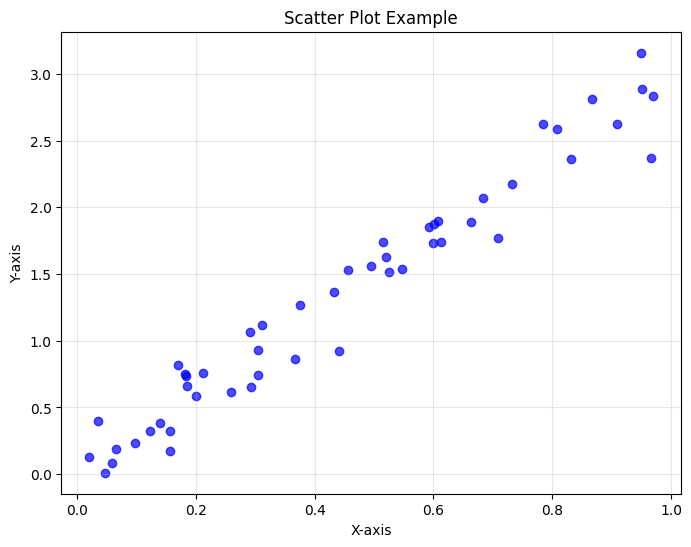

In [37]:
# Generate some random data
np.random.seed(42)
x = np.random.rand(50)
y = x * 3 + np.random.normal(0, 0.2, 50)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.7)
plt.title('Scatter Plot Example')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True, alpha=0.3)
plt.show()

### 26. How do you calculate the correlation matrix using Seaborn and visualize it with a heatmap?


Correlation matrix using Seaborn:
            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


<Axes: >

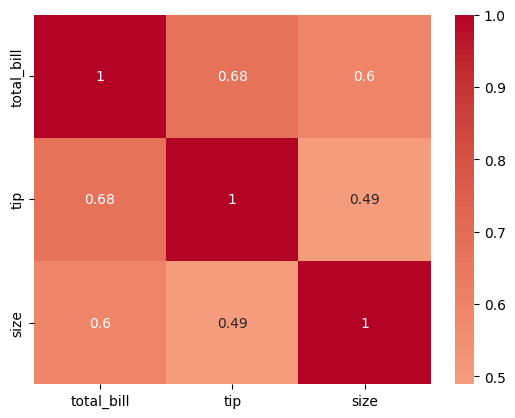

In [38]:
#How do you calculate the correlation matrix using Seaborn and visualize it with a heatmap?
print("\nCorrelation matrix using Seaborn:")
tips = sns.load_dataset('tips')
tips_corr = tips[['total_bill', 'tip', 'size']].corr()
print(tips_corr)
# correlation matrix shows the correlation between total_bill, tip, and size means the higher the total_bill the higher the tip and size

sns.heatmap(tips_corr, annot=True, cmap='coolwarm', center=0)


### 27 Generate a bar plot using Plotly

In [39]:
# Generate a bar plot using Plotly
print("\nBar plot using Plotly:")
df = pd.DataFrame({
    'A': ['A', 'B', 'C', 'D'],
    'B': [10, 20, 15, 25]
})
print("DataFrame for bar plot:")
fig = px.bar(x=df['A'], y=df['B'], title='Bar Plot Example', labels={'x': 'Category', 'y': 'Value'})
fig.show()


Bar plot using Plotly:
DataFrame for bar plot:


### 28. Create a DataFrame and add a new column based on an existing column?

In [43]:
# Create a DataFrame and add a new column based on an existing column
print("\nAdding a new column based on an existing column:")
df = pd.DataFrame(
    {
        'A': [1, 2, 3, 4],
        'B': [5, 6, 7, 8]
    }

)
print("Oringinal DataFrame:")
print(df)
df["C"] = df["A"]+df["B"]
print("DataFrame after adding new column C (A + B):")
print(df)


Adding a new column based on an existing column:
Oringinal DataFrame:
   A  B
0  1  5
1  2  6
2  3  7
3  4  8
DataFrame after adding new column C (A + B):
   A  B   C
0  1  5   6
1  2  6   8
2  3  7  10
3  4  8  12


### 29. Write a program to perform element-wise multiplication of two NumPy arrays?

In [44]:
# Write a program to perform element-wise multiplication of two NumPy arrays
print("\nElement-wise multiplication of two NumPy arrays:")
array1 = np.array([1, 2, 3])
array2 = np.array([4, 5, 6])
print("Array 1:")
print(array1)
print("Array 2:")
print(array2)
result = array1 * array2
print("Result of element-wise multiplication:")
print(result)



Element-wise multiplication of two NumPy arrays:
Array 1:
[1 2 3]
Array 2:
[4 5 6]
Result of element-wise multiplication:
[ 4 10 18]


### 30. Create a line plot with multiple lines using Matplotlib


Line plot with multiple lines using Matplotlib:


C:\Users\patid\AppData\Local\Temp\ipykernel_8660\2898826174.py:12: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



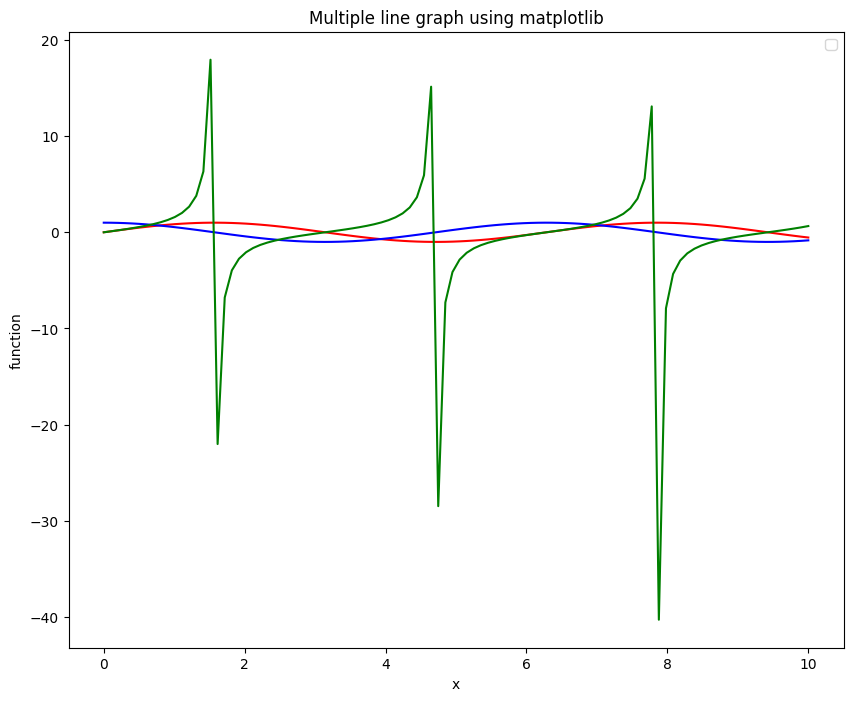

In [49]:
# Create a line plot with multiple lines using Matplotlib
print("\nLine plot with multiple lines using Matplotlib:")
x = np.linspace(0,10,100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

plt.figure(figsize=(10,8))
plt.plot(x,y1 , color='r')
plt.plot(x,y2,color='b')
plt.plot(x,y3 , color='g')
plt.legend()
plt.ylabel('function')
plt.xlabel('x')
plt.title("Multiple line graph using matplotlib")
plt.show()

### 31. Generate a Pandas DataFrame and filter rows where a column value is greater than a threshold

In [51]:
# Generate a Pandas DataFrame and filter rows where a column value is greater than a threshold
print("\nFiltering rows in a DataFrame based on a condition:")
df = pd.DataFrame(
    {
        'A': [1, 2, 3, 4],
        'B': [5, 6, 7, 8]
    }
)
print("Original DataFrame:")
print(df)
threshold = 5
filtered_df = df[df['B'] > threshold]
print(f"Filtered DataFrame (B > {threshold}):")
print(filtered_df)


Filtering rows in a DataFrame based on a condition:
Original DataFrame:
   A  B
0  1  5
1  2  6
2  3  7
3  4  8
Filtered DataFrame (B > 5):
   A  B
1  2  6
2  3  7
3  4  8


###  32. Create a histogram using Seaborn to visualize a distribution


Histogram using Seaborn:


<Axes: xlabel='total_bill', ylabel='Count'>

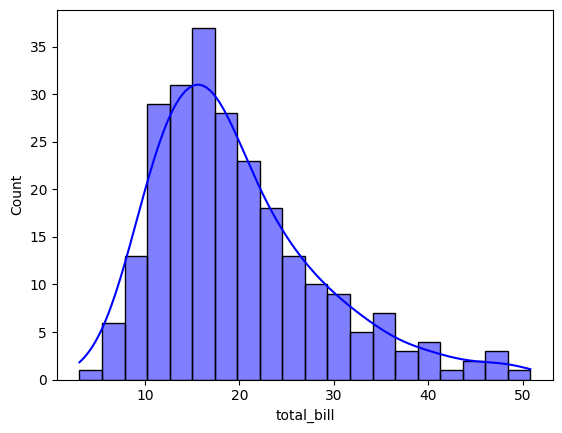

In [53]:
#  Create a histogram using Seaborn to visualize a distribution
print("\nHistogram using Seaborn:")
tips = sns.load_dataset('tips')
sns.histplot(tips['total_bill'], bins=20, kde=True, color='blue')

###  33.Perform matrix multiplication using NumPy

In [57]:
#  Perform matrix multiplication using NumPyA
print("\nMatrix multiplication using NumPy:")
matrix1 = np.array([[1, 2], [3, 4]])
matrix2 = np.array([[5, 6], [7, 8]])
print("Matrix 1:")
print(matrix1)
print("Matrix 2:")
print(matrix2)
print(np.dot(matrix1, matrix2))
print(matrix1 @ matrix2)
print(np.matmul(matrix1, matrix2))


Matrix multiplication using NumPy:
Matrix 1:
[[1 2]
 [3 4]]
Matrix 2:
[[5 6]
 [7 8]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


### 34. Use Pandas to load a CSV file and display its first 5 rowsA

In [58]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')
print("\nTitanic dataset:")
print(df.head())


Titanic dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


### 35.  Create a 3D scatter plot using Plotly.

In [64]:
# Create a 3D scatter plot using Plotly.
tips = sns.load_dataset('tips')
print("\n3D scatter plot using Plotly:")
fig = px.scatter_3d(tips, x='total_bill', y='tip', z='size', color='day', title='3D Scatter Plot of Tips Dataset')
fig.show()


3D scatter plot using Plotly:
